In [45]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 1000)
import matplotlib.pyplot as plt
from src.cleaner import *
pd.options.mode.chained_assignment = None
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("cyberpunk")
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [2]:
df=pd.read_csv('data/first_mens_scrape8660.csv')

In [3]:
df=cleaner(df)

In [4]:
df=rating_unpack(df)

In [5]:
df=create_columns_from_dic(df,'main accords')

In [6]:
df=notes_unpack(df)

In [7]:
df=df.drop(304)

In [8]:
df=df.drop(columns=['_id','image','description','top notes id','mid notes id','base notes id','user voted notes','user review date','similiar fragrences by user vote'])

In [9]:
#normalize data of user voted columns
sillage=df[['close to skin','radiates about arm length','radiates 6ft','fills room']]
sig=df[['have it','had it','want it']]
season=df[['winter','spring','summer','autumn']]
tod=df[['day','night']]
ratings=df[['female love u25','female love o25','male love u25','male love o25','female like u25','female like o25','male like u25','male like o25','female dislike u25','female dislike o25','male dislike u25','male dislike o25']]
normalized_sillage = preprocessing.normalize(sillage,axis=0)
normalized_sig = preprocessing.normalize(sig,axis=0)
normalized_season = preprocessing.normalize(season,axis=0)
normalized_tod = preprocessing.normalize(tod,axis=0)
normalized_ratings = preprocessing.normalize(ratings,axis=0)

In [10]:
sillage=pd.DataFrame()

In [11]:
sillage['name']=df['name']

In [12]:
#create sillage df with normalized votes
sillage['stay on skin']=normalized_sillage[:,0]
sillage['arm length']=normalized_sillage[:,1]
sillage['radiate 6ft']=normalized_sillage[:,2]
sillage['full room']=normalized_sillage[:,3]

In [13]:
#add ratings with normalized votes to df
sillage['female love u25']=normalized_ratings[:,0]
sillage['female love o25']=normalized_ratings[:,1]
sillage['male love u25']=normalized_ratings[:,2]
sillage['male love o25']=normalized_ratings[:,3]
sillage['female like u25']=normalized_ratings[:,4]
sillage['female like o25']=normalized_ratings[:,5]
sillage['male like u25']=normalized_ratings[:,6]
sillage['male like o25']=normalized_ratings[:,7]
sillage['female dislike u25']=normalized_ratings[:,8]
sillage['female dislike o25']=normalized_ratings[:,9]
sillage['male dislike u25']=normalized_ratings[:,10]
sillage['male dislike o25']=normalized_ratings[:,11]

In [14]:
sillage['avg rating']=df['avg rating']

In [15]:
sillage.describe()

,stay on skin,arm length,radiate 6ft,full room,female love u25,female love o25,male love u25,male love o25,female like u25,female like o25,male like u25,male like o25,female dislike u25,female dislike o25,male dislike u25,male dislike o25,avg rating
count,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000,7481.000000
mean,0.003536,0.003200,0.002938,0.003345,0.004259,0.005566,0.006459,0.008688,0.004373,0.005665,0.006669,0.009282,0.003968,0.004287,0.005333,0.007450,3.279043
std,0.011008,0.011111,0.011183,0.011068,0.010750,0.010134,0.009590,0.007629,0.010704,0.010079,0.009445,0.006893,0.010860,0.010738,0.010259,0.008842,1.489368
min,0.000000,0.000000,0.000000,0.000000,0.001820,0.000768,0.000727,0.000221,0.001733,0.000757,0.000620,0.000214,0.002295,0.001134,0.001096,0.000388,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.001820,0.000768,0.000727,0.000221,0.001733,0.000757,0.000620,0.000214,0.002295,0.001134,0.001096,0.000388,3.250000
50%,0.000361,0.000483,0.000356,0.000625,0.001820,0.000768,0.001455,0.007748,0.001733,0.000757,0.002480,0.010683,0.002295,0.001134,0.001096,0.005048,3.880000
75%,0.002527,0.001810,0.001602,0.002501,0.001820,0.006142,0.009457,0.014831,0.001733,0.006053,0.009918,0.014743,0.002295,0.002269,0.005478,0.010096,4.150000
max,0.349142,0.241757,0.244690,0.336745,0.182004,0.076774,0.072749,0.088544,0.173325,0.075668,0.061991,0.032050,0.229535,0.150877,0.109558,0.077663,5.000000


In [16]:
#find avg rating intervals for cologne given a small voting threshold to reduce outliers
avg_rating_4_5=sillage[(sillage['avg rating']>=4)&((sillage['male love o25']>=.007748) | (sillage['female love o25']>=0.000768 ))]
avg_rating_3_4=sillage[((sillage['avg rating']>=3) & (sillage['avg rating']<4))&((sillage['male love o25']>=.007748) | (sillage['female love o25']>=0.000768 ))]
avg_rating_2_3=sillage[((sillage['avg rating']>=2) & (sillage['avg rating']<3))&((sillage['male love o25']>=.007748) | (sillage['female love o25']>=0.000768 ))]
avg_rating_1_2=sillage[((sillage['avg rating']>=1) & (sillage['avg rating']<2))&((sillage['male love o25']>=.007748) | (sillage['female love o25']>=0.000768 ))]
avg_rating_0_1=sillage[((sillage['avg rating']>=0) & (sillage['avg rating']<1))&((sillage['male love o25']>=.007748) | (sillage['female love o25']>=0.000768 ))]

Text(0.5, 1.0, 'Sillage Importance')

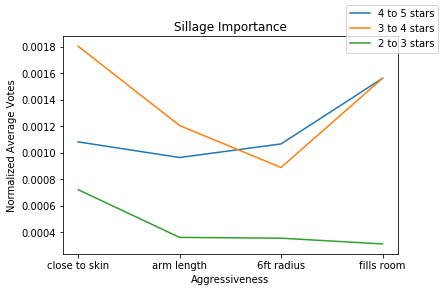

In [17]:
#create line graph for sillage levels for all frag's
sillage_type=['close to skin','arm length','6ft radius','fills room']
rating_4_5=[np.median(avg_rating_4_5['stay on skin']),np.median(avg_rating_4_5['arm length']),np.median(avg_rating_4_5['radiate 6ft']),np.median(avg_rating_4_5['full room'])]
rating_3_4=[np.median(avg_rating_3_4['stay on skin']),np.median(avg_rating_3_4['arm length']),np.median(avg_rating_3_4['radiate 6ft']),np.median(avg_rating_3_4['full room'])]
rating_2_3=[np.median(avg_rating_2_3['stay on skin']),np.median(avg_rating_2_3['arm length']),np.median(avg_rating_2_3['radiate 6ft']),np.median(avg_rating_2_3['full room'])]

plt.plot(sillage_type,rating_4_5)
plt.plot(sillage_type,rating_3_4)
plt.plot(sillage_type,rating_2_3)
plt.figlegend(['4 to 5 stars','3 to 4 stars','2 to 3 stars'],loc=1)
plt.ylabel('Normalized Average Votes')
plt.xlabel('Aggressiveness')
plt.title("Sillage Importance")


In [23]:
test=sillage[((sillage['male love o25']>=.007748) | (sillage['female love o25']>=0.000768 ))]

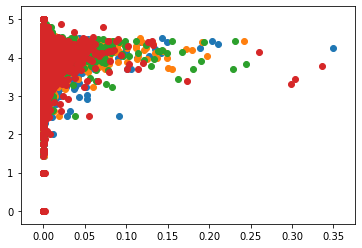

In [26]:
rates=sillage['avg rating']
skin_score=sillage['stay on skin']
arm_score=sillage['arm length']
sixfeet_score=sillage['radiate 6ft']
room_score=sillage['full room']

plt.scatter(skin_score,rates)
plt.scatter(arm_score,rates)
plt.scatter(sixfeet_score,rates)
plt.scatter(room_score,rates)

In [18]:
df[['name','signature']].sort_values(by='signature',ascending=False).head(20)

,name,signature
7234,La Nuit de l'Homme Yves Saint Laurent for men,395
7235,Terre d'Hermes Hermès for men,392
6660,Bleu de Chanel Chanel for men,358
5945,Fahrenheit Christian Dior for men,266
860,Sauvage Christian Dior for men,263
859,Versace Pour Homme Versace for men,255
5947,L'Homme Yves Saint Laurent for men,209
6661,Allure Homme Sport Eau Extreme Chanel for men,208
5638,L'Eau d'Issey Pour Homme Issey Miyake for men,208
3940,Le Male Jean Paul Gaultier for men,207


### NLP SENTIMENT ANALYSIS

In [176]:
user=pd.DataFrame()

In [177]:
user['name']=df['name']

In [178]:
user['bow']=df['user reviews']

In [179]:
user['avg rating']=df['avg rating']

In [180]:
user=user[user['avg rating']>=4.01]

In [181]:
user.reset_index(inplace=True)

In [182]:
user

,index,name,bow,avg rating
0,5,Insurrection II Wild Reyane Tradition for men,{'OldFragMan': 'I like it 9 out of 10Great sil...,4.44
1,8,New West for Him Aramis for men,{'neinmuses': 'rugged with a touch of sophisti...,4.21
2,23,New York for Gentlemen Brooks Brothers for men,"{'HisTyNess': 'This is indeed a safe, conserva...",4.26
3,29,Douro Penhaligon's for men,{'Noddygoestotoyland': 'The most refined Eau d...,4.25
4,37,L'Homme Roger & Gallet for men,"{'jjames799': 'Nice green, clean and woody mas...",4.37
...,...,...,...,...
1566,7471,Touch Grigio Perla La Perla for men,{'jewel1992': 'Hello:Does anyone know when thi...,4.21
1567,7475,Bois de Gayac Antonio Visconti for men,{'trabuquera': 'Stunning - one of the most bea...,4.23
1568,7477,Burberry London for Men Special Edition 2009 B...,"{'Bigsly': 'This reminds me a bit of Aventus, ...",4.43
1569,7479,Vetiver L.T. Piver for men,{'Andy the Frenchy': 'Nice old school thin bod...,4.22


In [ ]:
#Create df of users and comments

In [26]:
rating1=create_columns_from_dic(user[:400],'bow')

In [37]:
rating2=create_columns_from_dic(user[400:700],'bow')

In [38]:
rating3=create_columns_from_dic(user[700:1000],'bow')

In [39]:
rating4=create_columns_from_dic(user[1000:1300],'bow')

In [40]:
rating5=create_columns_from_dic(user[1300:1600],'bow')

In [41]:
rating6=create_columns_from_dic(user[1600:1900],'bow')

In [42]:
rating7=create_columns_from_dic(user[1900:2200],'bow')

In [43]:
rating8=create_columns_from_dic(user[2200:2400],'bow')

In [44]:
rating9=create_columns_from_dic(user[2400:],'bow')

In [191]:
rating10=create_columns_from_dic(user[0:100],'bow')

In [76]:
#user_results = pd.concat([rating1,rating2,rating3,rating4,rating5,rating6,rating7,rating8,rating9],axis=0,sort=False)

In [47]:
#rating5[(rating5['kyleblinder'].notna())& (rating5['kyleblinder']!=0)]

,index,name,avg rating,biroo,BurtReynolds,jeffandgoldie2,Arbi,aet,emiana,chokolattecoffee,AbBlue,voodoodanny,romano cholin,atarilynx,weaselize,keyvan2013,s alswayeq,ropname,kapuka,kerikerinzfragger,Adriana Candiotto,[email protected]@r,tolgaselcuk,enevictor,baronbvp,johnnyjazz,rwillems,Merino-Teflon,Giskela,doc blu,SP1685,richard legg,gatsby,bonovox,Nicely,JovanK,HOTRODS BY JP,vaniljapulla,udrako,macpro,Babybenzz,said mubarok 96,juancar_66,miracleborgtech,Manuel Kazanjian,hyperm3,kaka088,Jillzilla,personne,stephen r,Teahupoo,ASCENTOFMAN,Ravenwind,beogradbeogradbeograd,purplesun,ahmadfelemban,gkotsis1,Ocd scents,palmtrees403,ViouAmara,StinkOMatic,Casper112,Vmaster,dante11,mashraf,dwy,raj kanaj,Sighclone,m t alkawa,SmellGood25,tetracom,happychub,Willmerc12,smpalmer85,PuppyGumDrop,parham darestani,zhori,Fonvad,rzetzm,Rhaegal,2metrose4,Jack1Rip1BurnIt,yukimarloner,fahad al dowailah,rcavs,Eaugirlspirit,cassandra5322,Tonka Truck Bean,sylasjsn,nattonline,akawanis,Thiago Mendes,Barolo,Craycola,yann33,Yourhumblenarrator,dmandic!,KajiraSuzanne,Diablo,Nemosh,arhman,vickun,zareliman,rockets,crownvic808,micrtin,sebeck666,Theotherrome,Ih8cedar,FreshTones,raluxgaza,chridela,jazz444,MrAbbas,oksaoksa,Nickofengland,cammy139,Ben's Aldehyde,hatandbeard,manpen,prizbenjamin,uniqueq86,vergil_s,bukerches,DrMatt,serje allen 2,Madcity Boy,StratonOakmont,magneto78,debeloto,oroszcindy,Herman,isabelamattarelli,smalldog_jr,miritini,mhouda,Saeidreza,LuvWarrior,moppety27,onixx,raverdudes,JJ12345,talldarkroast,kyloe,vitop,elGonzo,promoscanner,Olka,honeypoppyseed,Abbas,mikpass,Douglasrobert,clydefelts,Jonz1988,Suekkk,Bdeville,hullhockey91,JogaBonito,WildDove,Keremgok,Martaine,Pmy,Eloy,hamzaar93,Plucus21,Dariel C,Vas5,falah alazmi 5,pheta,FatFragHead,Cmf,highdef,killdec,sebikiraly,ozlemmenguloglu,GoldIris,KuMn2GeTyA,alahoop,Kdu,ateghipc,elaida_00,rob2b,OneRedRose,BeauBleue,HickorySmoke,alex193,hunmmm,Evisak,cake n' cuddles,roman_turism,Liamsardea,Kometboy619,LJUBsify,gardencat13,The_Falcon,eau_my_toilet,hernie,alfrued,purecaramel,Shugenja,mpb23,llloyd,Hall2799,orpailleur,Waterman11,psyside,burstup,dragonfruit2015,Nurse Feratu,paulo oz 1,jpierce1,Tpainter2,Greggers,rodolfo,Erinbath22,keoncharles27,Ron22,clrieger,Trvevil,Bluejitzu,logre23,Agnes1,Mihai87,Lou E Lov,D&gredcap,adyyy7,mfinz8,HisTyNess,Medes,Cypher10261,LAboy scent expert,Kysyona,FLMonteiro,Gandhi76,brendancollins1238,Mighty lion,c davis,dreh,swimr8,Oobleck985,DanielSan22,camagc,sanicojo,Cheadle,danshobiz,amosfiocchi70,meow_83,Labaloo,Stallone Italiano,Jhick8787,xanthus_69,BLACKHORSE1966,n3otyp3,micp,36thDisciple,rag311,ularewolf,and_then_some_7,AmanM,aidydzahir,SaviFresh89,whatisrealwillprosper,Matías Ross,mohsen j,pableen,AstralMatrix,laurniko,iowahawkeye63,majestic mammy,chanelnumerocinq,Fizzy,DWOG,WorldSpinsMadly,NY Frag Snob 22,ahmadnademi,Molko,haddock,suhejb_sesh,MrClappa,Hashimoto,juniemoon,rojacollector,FaithNChrist87,Kiezin,danielresendem,Chuckphilpott,haythoma,Salvas,DrBilal,jay_b95,mn77393,jamiehammond1980,PFGL90,cerberus08,brianossett,Fa,michaelwarming,Moonchild1985,jeca,clross26,neffyo,dean okoh,Terfle,ITBoa,colin72,sodavarsaiceriz2,sinnitin,MehrSD,Sierrasaurusrex,dolcethadon,Chuntset,cedric fichtner,GILscent,Ziggy2012,MegaMav,oxfordrama,huskussam,phlegyas,hels,midos,mostafa88,Mikeinmich,bay224,ancientcoins0,mickers,pavillon,wbp,edelcarril,MarFreire,SEA Fragrance,shinchan,Joeyvice,pattnaik,LibraMoon,Alan Felipe,dfm2014,amer1212,tucktimosprime,Yann2zen,leimolavida,tc312,roufaida ahmed,rakan1985,mshini,gregk,Aspendina,Pine Rocks,roseombre,candaricky,Chattermonkey,vahidzand,Darkwolf,Yaro,Jackfusion,blackout05,TheEssence,interizta,logger64,busyworksbeats,libou,Armando_approved,afraafra,Sweet_Heart,fabG,andrebovolini1,TheMostSavage,bronstein,skyelightfetish,LenaBel,Smellinggoodislife,mystica,raiza1990,jcgermer,pedi123,Haroonjil,talk0,СергейРБ,gingentleman,Fragrance Guy,kam_batra,starvinartus,teoteddy1,FragranceFinder,albert romero,moimeme,inkonito13,Dreamcatcher92,missk,Renodakato,thalia demak

In [212]:
sia = SIA()


cols=user_results.columns
cols=cols.drop(['name','index','avg rating'])
for idx,i in enumerate(cols):
        reviews=user_results[i]
        for idx1,review in enumerate(reviews):
            if review != 0:
                pol_score = sia.polarity_scores(review)
                name=user_results['name'][idx1]
            else:
                continue
                
            if pol_score['neg'] >= .25:
                rating=1
            elif pol_score['neg'] >= .12:
                rating=2
            elif pol_score['pos'] >= .25:
                rating=5
            elif pol_score['pos'] >= .15:
                rating=4
            else:
                rating=3
                
            user_table[name][idx] = rating
                

In [210]:
user_table=pd.DataFrame()

In [211]:
for i in user_results['name']:
    user_table[i]=np.zeros(21279)



In [216]:
user_table.iloc[1050].sum()

27.0

In [197]:
user_results=user_results.fillna(0)

In [209]:
user_results

index                                               name  avg rating  \
0         5      Insurrection II Wild Reyane Tradition for men        4.44   
1         6           White Musk For Men The Body Shop for men        4.08   
2         8                    New West for Him Aramis for men        4.21   
3        13                   Homme Nature Yves Rocher for men        4.02   
4        23     New York for Gentlemen Brooks Brothers for men        4.26   
...     ...                                                ...         ...   
2589   7476  Twilight Woods for Men Bath and Body Works for...        4.01   
2590   7477  Burberry London for Men Special Edition 2009 B...        4.43   
2591   7479                         Vetiver L.T. Piver for men        4.22   
2592   7480               212 Men Ice Carolina Herrera for men        4.36   
2593   7481                    Fever pour Homme Celine for men        4.04   

     Izy79 darmin66 Smile scent compuneer MikeD75 Prestigious_Fragrances  \
0        0        0           0         0       0                      0   
1        0        0           0         0       0                      0   
2        0        0           0         0       0                      0   
3        0        0           0         0       0                      0   
4        0        0           0         0       0                      0   
...    ...      ...         ...       ...     ...                    ...   
2589     0        0           0         0       0                      0   
2590     0        0           0         0       0                      0   
2591     0        0           0         0       0                      0   
2592     0        0           0         0       0                      0   
2593     0        0           0         0       0                      0   

     BurtReynolds aeo005                                                aet  \
0               0      0  What a great value! Great scent, great perform...   
1               0      0                                                  0   
2               0      0                                                  0   
3               0      0                                                  0   
4               0      0  A nice blast of citrus with a vetiver undercur...   
...           ...    ...                                                ...   
2589            0      0                                                  0   
2590            0      0                                                  0   
2591            0      0                                                  0   
2592            0      0                                                  0   
2593            0      0                                                  0   

     emiana nima_dolati protector Raees Saint victor ali psychoskip djmail  \
0         0           0         0           0          0          0      0   
1         0           0         0           0          0          0      0   
2         0           0         0           0          0          0      0   
3         0           0         0           0          0          0      0   
4         0           0         0           0          0          0      0   
...     ...         ...       ...         ...        ...        ...    ...   
2589      0           0         0           0          0          0      0   
2590      0           0         0           0          0          0      0   
2591      0           0         0           0          0          0      0   
2592      0           0         0           0          0          0      0   
2593      0           0         0           0          0          0      0   

     voodoodanny AbBlue jcravenw Billy Belial max lecrone atarilynx Fogwalker  \
0              0      0        0            0           0         0         0   
1              0      0        0            0           0         0         0   
2              0      0    

In [ ]:
user_table.to_csv('data/user_reviews_top2600.csv')